#Análisis de tickets Allsenso (AIUT)

Planteamiento del problema:Análisis de datos de tickets del departamento de ALLSENSO.

Recopilar los datos necesarios para implementar un sistema de análisis de tickets. Preparar código para poder responder estar estas preguntas:


1.   Promedio de duración de tickets (Máximo)
2.   Promedio de duración de servicios
3.   Promedio de duración de instalaciones
4.   ¿Cuántas horas trabajo por día?
5.   Obtener el comentario más solicitado
6.   Cuáles son las horas más solicitadas para   instalaciones
7.   Cuál es el tiempo que más ha durado un ticket










In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
aiutdf=pd.read_csv("aiutofficer.csv")
aiutdf


,DATA,OD,DO,CZAS,KOMENTARZ,NR TEMATU
0,1/09/22,08:00,08:46,0:46,318651 - SOT QSR Installation,19-0169
1,1/09/22,08:46,09:22,0:36,318663 - SOT QSR Installation,19-0169
2,1/09/22,09:22,16:00,6:38,SL1 - zadania cykliczne,ALS-SO-ALST-01.01.01
3,2/09/22,08:00,08:35,0:35,318779 - Surtigas changed location state to sc...,19-0169
4,2/09/22,08:35,08:45,0:10,318819 - SOT QSR Service,19-0169
...,...,...,...,...,...,...
161,29/09/22,10:54,16:00,5:06,SL1 - zadania cykliczne,ALS-SO-ALST-01.01.01
162,30/09/22,08:00,08:52,0:52,323331 - SOT QSR Service,19-0169
163,30/09/22,08:52,08:59,0:07,323192 - IMR16 Packet Counter 30.09.2022 04:00:08,ALS-SO-ALST-01.01.01
164,30/09/22,08:59,09:30,0:30,323247 - Surtigas changed location state to sc...,ALS-SO-ALST-01.01.01


In [ ]:
#Limpieza de datos
aiutdf["KOMENTARZ"]=aiutdf["KOMENTARZ"].str.replace(' - ','.')
df_2 = aiutdf["KOMENTARZ"].str.split('.', expand = True)
df_2=df_2.drop([2,3], axis=1)
aiutdf = pd.concat([aiutdf,df_2], axis = 1)
aiutdf=aiutdf.drop(["KOMENTARZ"], axis=1)
aiutdf = aiutdf.rename(columns={'DATA':'DAY','OD':'START TIME','DO':'END TIME','CZAS':'DURATION','NR TEMATU':'KEY',0:'ID',1:'SERVICE-NAME'})
aiutdf

,DAY,START TIME,END TIME,DURATION,KEY,ID,SERVICE-NAME
0,1/09/22,08:00,08:46,0:46,19-0169,318651,SOT QSR Installation
1,1/09/22,08:46,09:22,0:36,19-0169,318663,SOT QSR Installation
2,1/09/22,09:22,16:00,6:38,ALS-SO-ALST-01.01.01,SL1,zadania cykliczne
3,2/09/22,08:00,08:35,0:35,19-0169,318779,Surtigas changed location state to scheduled
4,2/09/22,08:35,08:45,0:10,19-0169,318819,SOT QSR Service
...,...,...,...,...,...,...,...
161,29/09/22,10:54,16:00,5:06,ALS-SO-ALST-01.01.01,SL1,zadania cykliczne
162,30/09/22,08:00,08:52,0:52,19-0169,323331,SOT QSR Service
163,30/09/22,08:52,08:59,0:07,ALS-SO-ALST-01.01.01,323192,IMR16 Packet Counter 30
164,30/09/22,08:59,09:30,0:30,ALS-SO-ALST-01.01.01,323247,Surtigas changed location state to scheduled


#Promedio de duración de tickets (Máximo)

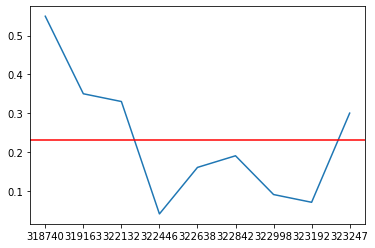

In [ ]:
#Promedio de duración de tickets (Máximo)
df_limpiar=aiutdf
#Limpiar los tickets 
df_limpiar2 = df_limpiar[(df_limpiar['KEY'] == "19-0169") | (df_limpiar['SERVICE-NAME'] == "zadania cykliczne")].index
df_limpiar  = df_limpiar.drop(df_limpiar2)
df_limpiar3 = df_limpiar[(df_limpiar['KEY'] == "ALS-SO-ALST-01.01.01") & (df_limpiar['SERVICE-NAME'] == "SOT QSR Service")].index
df_limpiar  = df_limpiar.drop(df_limpiar3)
df_limpiar['DURATION']=df_limpiar['DURATION'].str.replace(':',".",case = False)
df_limpiar['DURATION']=df_limpiar['DURATION'].astype(float)
media=df_limpiar['DURATION'].mean()
#Gráfico
plt.plot( df_limpiar['ID'], df_limpiar['DURATION'])
plt.axhline(y=media, color='r', linestyle='-')

In [ ]:
aiutdf_service=aiutdf[aiutdf['KOMENTARZ'].str.contains(r"\bInstallation\b", regex=True)]


,DATA,OD,DO,CZAS,KOMENTARZ,NR TEMATU
0,1/09/22,08:00,08:46,0:46,318651.SOT QSR Installation,19-0169
1,1/09/22,08:46,09:22,0:36,318663.SOT QSR Installation,19-0169
8,2/09/22,09:35,10:08,0:33,318842.SOT QSR Installation,19-0169
11,2/09/22,10:58,11:43,0:45,318852.SOT QSR Installation,19-0169
19,5/09/22,08:56,09:16,0:20,319178.SOT QSR Installation,19-0169
44,7/09/22,13:07,13:54,0:47,319611.SOT QSR Installation,19-0169
57,9/09/22,08:49,09:31,0:42,319952.SOT QSR Installation,19-0169
58,9/09/22,09:31,10:42,1:11,319966.SOT QSR Installation,19-0169
59,9/09/22,10:42,11:06,0:24,319979.SOT QSR Installation,19-0169
67,12/09/22,09:42,10:33,0:51,320366.SOT QSR Installation,19-0169
